## Create the two loops

In [1]:
import sys
import sys
import os
ROOT  = "../"
# Add current working directory to sys.path
sys.path.append(ROOT)
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/")
from PointList import *
%matplotlib widget 
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from _3DLoops._3dpu_using_dfs import *
from Block_edges.block_edges import *
import sys
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/MIP_constraints/Python/")
from CreatingCycles import *

## The two loops

In [2]:
def loop(r,O, num_points):
    xo,yo,zo = O
    points = PointList()
    for n in tqdm(range(num_points)):
        theta = n * 2 * math.pi / num_points
        x = r * math.cos(theta) + xo
        y = r * math.sin(theta) + yo
        points.add_point((x,y,zo))
    return points

In [3]:
points1 = loop(3,(0,0,0.5), 100)
points2 = loop(3,(0,0,2.5), 100)

100%|██████████| 100/100 [00:00<00:00, 530253.35it/s]


## Fill in the said loop

In [4]:
loops = [points1,points2]
List_M = []
for loop in loops:
    M = Edge_Flipping(loop,10*len(loop.points))
    M.create_quadrilaterals()
    M.split_quadrilateral()
    M.canonic_representation_from_mesh()
    M.clean_triangles()
    M.fill_edges()
    M.update_weights()
    M.mapping = [np.array(o) for o in M.mapping]
    List_M.append(M)

s is 4


100%|██████████| 401/401 [00:00<00:00, 31027.08it/s]


s is 4


100%|██████████| 401/401 [00:00<00:00, 29558.64it/s]


In [5]:
epsilon = 0.01
List_edges = []
for M in List_M:
    area = M.calculate_area()
    print(len(M.triangles))
    for i in tqdm(M.inside_indexes):
        M.update_mapping(i)
    D = M.lawson_flip()
    new_area = M.calculate_area()
    print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])
    while  area - new_area > epsilon:
        area = M.calculate_area()
        M.update_weights()
        for i in tqdm(M.inside_indexes):
            M.update_mapping(i)
        M.lawson_flip()
        new_area = M.calculate_area()
    E = Block_edges(M.triangles,M.mapping)
    E.block_all_the_edges()
    List_edges.append(E.blocked_edges)


900


100%|██████████| 401/401 [00:00<00:00, 41562.65it/s]
1509it [00:00, 46814.34it/s]            
1414it [00:00, 51892.08it/s]            
1401it [00:00, 52401.22it/s]            
100%|██████████| 1400/1400 [00:00<00:00, 52645.96it/s]


28.255733788191037 -3.161915174132446e-13 1.060205518548191e-09 411


100%|██████████| 900/900 [00:01<00:00, 482.55it/s]


900


100%|██████████| 401/401 [00:00<00:00, 41069.42it/s]
1519it [00:00, 45714.57it/s]            
1411it [00:00, 51943.33it/s]            
100%|██████████| 1400/1400 [00:00<00:00, 52980.84it/s]


28.255733788191034 -3.126388037344441e-13 1.0761718686469715e-07 46


100%|██████████| 900/900 [00:01<00:00, 472.86it/s]


In [6]:
Edges = []
for list_edges in tqdm(List_edges):
    for edge in list_edges:
        
        Edges.append([list(edge[0]),list(edge[1])])

100%|██████████| 2/2 [00:00<00:00, 8042.77it/s]


In [7]:

Edges = set([tuple((tuple(edge[0]),tuple(edge[1]))) for edge in Edges])
Edges = list(Edges)


NameError: name 'Points' is not defined

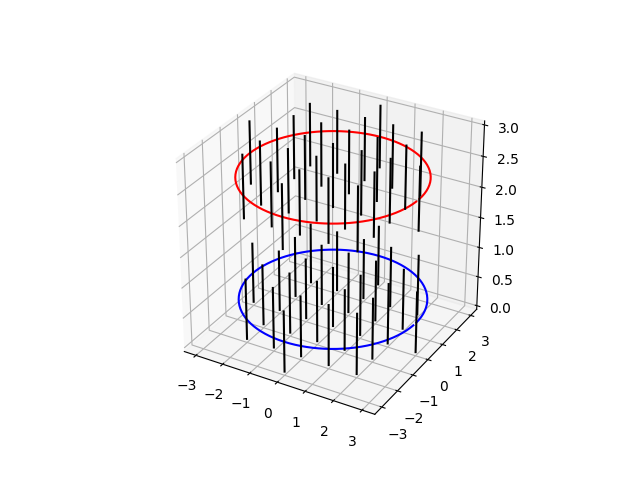

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X = []
Y = []
Z = []

# Draw loop of points
for point in points1.points:
    x, y, z = point
    X.append(x)
    Y.append(y)
    Z.append(z)

ax.plot(X, Y, Z, color='b')

X1,Y1,Z1 = [],[],[]

for point in points2.points:
    x, y, z = point
    X1.append(x)
    Y1.append(y)
    Z1.append(z)
ax.plot(X1, Y1, Z1, color='red')


A,B,C = [],[],[]

# for point in cycle:
#     x, y, z = G.mapping[point]
#     A.append(x)
#     B.append(y)
#     C.append(z)
# ax.plot(A, B, C, color='green')


for edge in Edges:
    ax.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]],[edge[0][2],edge[1][2]],color='black')

for point in Points:
    for point2 in  Points:
        if point != point2:
            ax.plot([point[0],point2[0]],[point[1],point2[1]],[point[2],point2[2]],color='green')

X = np.concatenate((X,X1))
Y = np.concatenate((Y,Y1))
Z = np.concatenate((Z,Z1))

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()


## Gurobi Model

In [ ]:
import sys
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/MIP_constraints/Python/")
from CreatingCycles import *

In [ ]:
G = GraphGrid3D(Edges,Edges)
for k in Edges :
    assert k  in G.edges, k

TypeError: unhashable type: 'set'

## Filling the MIP for problem constraints

In [28]:
Blocked_edges = Edges
Marked_edges = Edges[:-1]
GC = Graph_Cycles(Blocked_edges,Marked_edges)
print(len(Marked_edges))
len(Blocked_edges) - len(Marked_edges)

100%|██████████| 426/426 [00:00<00:00, 3303.29it/s]

57


1

In [29]:
def find_cycle_impair(GC):
    path = nx.shortest_path(GC.Graph_cycles,0,1)

    while not GC.get_full_cycle(path):
        cpt1 = np.random.randint(0,len(GC.dict_blocked_edges))
        blocked_edge = list(GC.blocked_edges)[cpt1]
        cycle_blocked = GC.dict_blocked_edges[blocked_edge]
        cycle_blocked_index = GC.cycles_index[cycle_blocked[np.random.randint(0,len(cycle_blocked))]]
        cycle_index = np.random.randint(0,len(GC.cycles))
        path = nx.shortest_path(GC.Graph_cycles,cycle_index,cycle_blocked_index)
    return GC.get_full_cycle(path)

In [33]:
cycle = find_cycle_impair(GC)

(-1.5, 4.5)

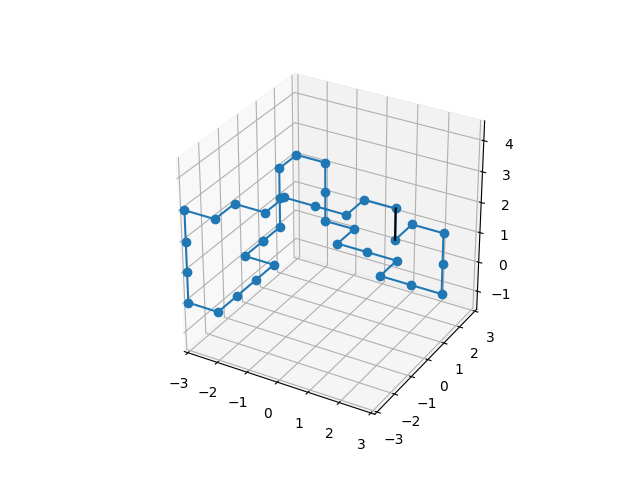

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
X,Y,Z = [],[],[]
ind = np.random.randint(0,len(GC.cycles))
G = GraphGrid3D(Blocked_edges,Marked_edges)
# for cycle in GC.dict_blocked_edges[(62, 63)]:
A,B,C = [],[],[]
for point in cycle:
    x, y, z = G.mapping[point]
    A.append(x)
    B.append(y)
    C.append(z)
    ##########
    X.append(x)
    Y.append(y)
    Z.append(z)

ax.plot(A, B, C,marker = "o") 

Blockii_edges = []
for i in range(len(cycle)):
    edge = min(cycle[i],cycle[(i+1)%len(cycle)]),max(cycle[i],cycle[(i+1)%len(cycle)])
    if edge in G.blocked_edges:
        Blockii_edges.append(edge)
    
for edge in Blockii_edges:
    x,y,z = G.mapping[edge[0]]
    x1,y1,z1 = G.mapping[edge[1]]
    ax.plot([x,x1],[y,y1],[z,z1],color="black")


# origin = 180
# x,y,z = G.mapping[origin]
# ax.plot(x,y,z,color="black",marker="x")

X,Y,Z = np.array(X),np.array(Y),np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

## Resolving the MIP problem

In [ ]:
import pulp

# Create a MIP problem
def resolve_MIP(cycles,Blocked_edges,GC):
    problem = pulp.LpProblem("Graph Problem", pulp.LpMinimize)
    GC = Graph_Cycles(Blocked_edges,Marked_edges)
    G = GraphGrid3D(Blocked_edges,[])
    # Define the decision variables
    x = pulp.LpVariable.dicts("x", G.edges, cat=pulp.LpBinary)

    # Define the objective function
    problem += pulp.lpSum([x[i] for i in G.edges])

    # detect a constraints
    cycle = find_cycle_impair(GC)
    cycles.append(cycle)
    E = []
    for cycle in cycles:
        edges = []
        for point in range(len(cycle)-1):
            node = cycle[point]
            next_node = cycle[(point+1)]
            edge = (min(node,next_node),max(node,next_node))
            edges.append(edge)
        E.append(edges)

    for edge in E:
        problem += pulp.lpSum(x[i] for i in edge) >= 1

    # Solve the MIP problem
    problem.solve()
    
    # Print the optimal solution
    print("Optimal Solution:")
    new_marked = []
    for i in G.edges:
        
        if pulp.value(x[i]) == 1:
            print(i)
            n,m = i
            new_marked.append([G.mapping[n],G.mapping[m]])
    # Print the objective value
    print("Objective Value:", pulp.value(problem.objective))
    return cycles,new_marked



In [72]:
Blocked_edges = Edges
Marked_edges = []
cycles = []
while GC.dict_blocked_edges :
    print("hey")
    cycles,new_marked = resolve_MIP(cycles,Blocked_edges,Marked_edges)
    print(len(cycles))
    print(len(new_marked))
    print(len(GC.dict_blocked_edges))
    Marked_edges = new_marked
    

100%|██████████| 483/483 [00:00<00:00, 5260.84it/s]

hey



/home/mehdii/.local/lib/python3.11/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


AttributeError: 'list' object has no attribute 'Graph_cycles'

In [74]:
GC.Graph_cycles